### Football player's market value prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/epldata_final.csv")

In [3]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [4]:
df.shape

(461, 17)

### EDA

In [5]:
df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [6]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [7]:
df[df.isna()==False]
df.isna().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df[df.isna()==False]
df.isna().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [10]:
clubs=df['club'].unique()
print(clubs)
print("Total clubs", len(clubs))

['Arsenal' 'Bournemouth' 'Brighton+and+Hove' 'Burnley' 'Chelsea'
 'Crystal+Palace' 'Everton' 'Huddersfield' 'Leicester+City' 'Liverpool'
 'Manchester+City' 'Manchester+United' 'Newcastle+United' 'Southampton'
 'Stoke+City' 'Swansea' 'Tottenham' 'Watford' 'West+Brom' 'West+Ham']
Total clubs 20


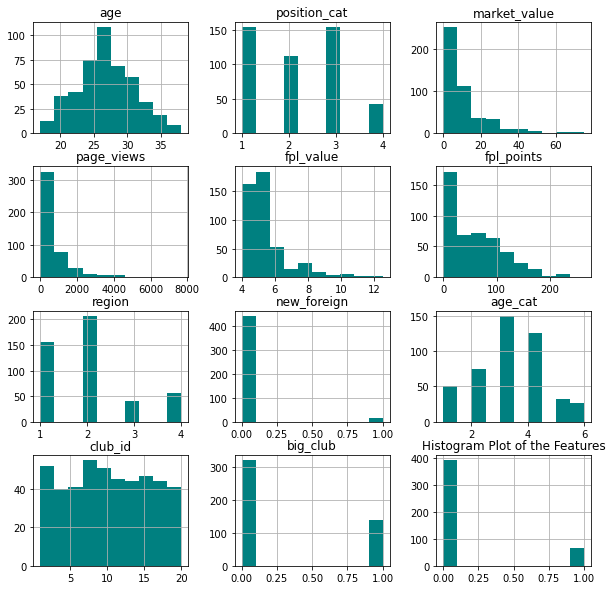

In [11]:
df.hist(figsize=(10,10), color='teal')
plt.title("Histogram Plot of the Features")
plt.show()

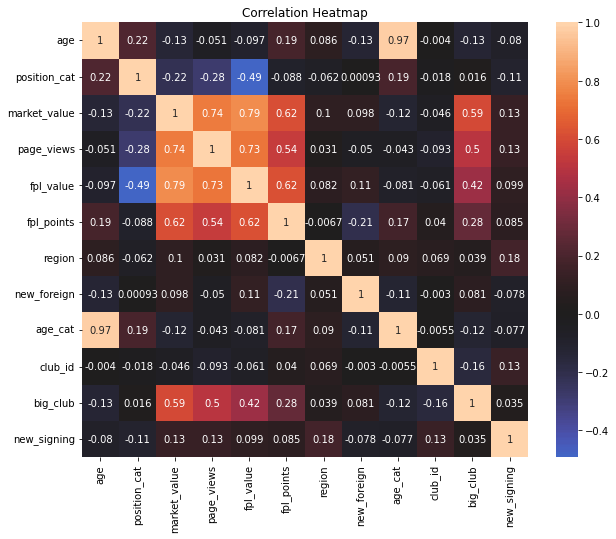

In [12]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, center=0)
plt.title("Correlation Heatmap")
plt.show()

### Scaling the data

In [13]:
df.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

In [14]:
X = df.drop(["name", "club", "age", "position", "market_value", "page_views", "fpl_sel", "nationality"], axis=1)
Y = df["market_value"]

In [15]:
X.head()

,position_cat,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,1,12.0,264,3.0,0,4,1,1,0
1,1,9.5,167,2.0,0,4,1,1,0
2,4,5.5,134,2.0,0,6,1,1,0
3,1,7.5,122,1.0,0,4,1,1,0
4,3,6.0,121,2.0,0,4,1,1,0


In [16]:
X.columns

Index(['position_cat', 'fpl_value', 'fpl_points', 'region', 'new_foreign',
       'age_cat', 'club_id', 'big_club', 'new_signing'],
      dtype='object')

In [17]:
print("X-shape", X.shape)
print("Y-shape", Y.shape)

X-shape (460, 9)
Y-shape (460,)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
standard_scaler = StandardScaler()

X[['fpl_value', 'fpl_points']] = standard_scaler.fit_transform(X[['fpl_value', 'fpl_points']])

In [20]:
X.head()

,position_cat,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
0,1,4.867071,3.893966,3.0,0,4,1,1,0
1,1,3.010334,2.065378,2.0,0,4,1,1,0
2,4,0.039557,1.443281,2.0,0,6,1,1,0
3,1,1.524945,1.217064,1.0,0,4,1,1,0
4,3,0.410904,1.198213,2.0,0,4,1,1,0


### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
print("Training: ", X_train.shape, "   ", y_train.shape)
print("Testing: ",X_test.shape, "   ", y_test.shape)

Training:  (368, 9)     (368,)
Testing:  (92, 9)     (92,)


### Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr_model = LinearRegression()

In [25]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = lr_model.predict(X_test)

### Accuracy of Model

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 34.80448736077189
Mean Absolute Error (MAE): 4.346795384143171
R-squared: 0.7811334826316265


### XGBoost Algo

In [29]:
import xgboost as xgb

In [30]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [31]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [32]:
y_pred = xgb_model.predict(X_test)

### Accuracy of Model

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 30.853362674842582
Mean Absolute Error (MAE): 3.7984292776040407
R-squared: 0.8059799597750374
